# A Brief History of Film data exploration

In [1]:
%matplotlib inline
import pandas as pd

In [188]:
from IPython.core.display import HTML
from IPython.display import display
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [182]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN


In [4]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,The Rising Son,1990
1,The Thousand Plane Raid,1969
2,Crucea de piatra,1993
3,The 86,2015
4,Gaiking II,2011


In [234]:
releases = pd.DataFrame.from_csv('data/release_dates.csv', index_col=None)
releases['date'] = releases['date'].astype('datetime64')
releases.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#AnonOccupy: Bio of a Villain,2015,USA,2015-11-05
2,#Beings,2015,Romania,2015-01-29
3,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21
4,#Nerealnaya lyubov,2014,Russia,2014-02-13


### Some Premilinary Curiosity

In [256]:
# Top 10 Most Common Movie Titles in Movie History
titles['title'].value_counts().head(10)

Hamlet                  19
Macbeth                 14
Carmen                  14
The Three Musketeers    12
The Outsider            11
She                     11
Blood Money             11
Maya                    11
The Promise             10
Eva                     10
dtype: int64

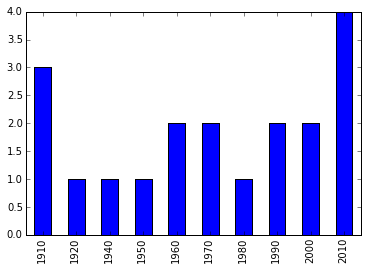

In [259]:
# Plot of the number of 'Hamlet' Movies made each decade
t = titles[titles.title == 'Hamlet']
(t.year // 10 * 10).value_counts().sort_index().plot(kind='bar')

In [262]:
# The Most Common Movie Character names in film history
cast.character.value_counts().head(10)

Himself       18905
Dancer        11002
Extra          8693
Reporter       7589
Doctor         6793
Policeman      6463
Student        6379
Nurse          6122
Bartender      6119
Minor Role     5814
dtype: int64

In [264]:
# 10 Most Common People Billed as 'Himself' in Film History
cast[cast.character == 'Himself'].name.value_counts().head(10)

Adolf Hitler             92
Richard Nixon            39
Ronald Reagan            31
John F. Kennedy          26
Ron Jeremy               24
Franklin D. Roosevelt    20
Bill Clinton             20
George W. Bush           20
Winston Churchill        20
Martin Luther King       19
dtype: int64

In [265]:
# And Herself?
cast[cast.character == 'Herself'].name.value_counts().head(10)

Joyce Brothers        14
Queen Elizabeth II    11
Margaret Thatcher      8
Joan Rivers            7
Mary Jo Pehl           7
Lady Gaga              5
Caroline Rhea          5
Marilyn Monroe         5
Bunny Yeager           5
Kareena Kapoor         5
dtype: int64

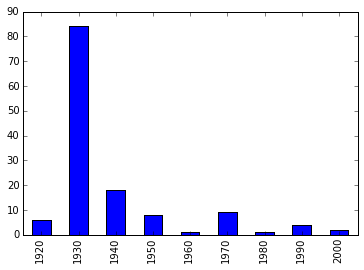

In [266]:
# Number of rustler characters in each decade of film
c = cast[cast.character == 'Rustler']
(c.year // 10 * 10).value_counts().sort_index().plot(kind='bar')

###Most Common Reoccurring Characters in Modern US Cinema

In [250]:
c = cast
c = c[(c.year >= 1970)]
c = c[c.n.notnull()]
c = c.merge(releases, how='left', on=['title', 'year'])
c = c[c.country == 'USA']
c = c.groupby([c.character, c.name]).size()
c = c[c.index.get_level_values('character') != c.index.get_level_values('name')]
ignore = 'Helicopter Himself Herself Priest Additional'
for char in ignore.split():
    c = c[c.index.get_level_values('character').str.contains(char) == False]

In [251]:
c.order(ascending=False).head(30)

character                        name               
Tsune (Torajiro's aunt)          Chieko Misaki          13
Torajiro Kuruma                  Kiyoshi Atsumi         13
Hiroshi (Sakura's husband)       Gin Maeda              13
Sakura Suwa (Torajiro's sister)  Chieko Baish?          13
Umetaro (Hiroshi's boss)         Hisao Dazai            13
Q                                Desmond Llewelyn       10
Special Vocal Effects            Frank Welker            9
Madea                            Tyler Perry             9
C-3PO                            Anthony Daniels         8
Joe                              Tyler Perry             8
Dancer                           Bryan Anthony           8
Ron Weasley                      Rupert Grint            8
Gregory Goyle                    Josh Herdman            8
Rubeus Hagrid                    Robbie Coltrane         8
Fred Weasley                     James Phelps            8
Draco Malfoy                     Tom Felton              8
Har

###Actors With the Most Roles in Each Decade

In [121]:
df = pd.DataFrame(decs.size())
df.columns = ['num_roles']
df = df.reset_index(['year', 'name'])
df.sort('num_roles', ascending=False).groupby('year').head(1).sort('year')

,year,name,num_roles
3,1890,Sailor Sharkey,2
40,1900,Joseph Schrode,2
5725,1910,James Neill,64
16824,1920,George Fawcett,95
45227,1930,Lee Phelps,332
60854,1940,Bess Flowers,286
97046,1950,Bess Flowers,242
172377,1960,Kenner G. Kemp,86
231664,1970,Helen,89
403037,1980,Shakti Kapoor,118


### Exploration of Frank Oz's Career

In [243]:
# His First 10 Films
c = cast[cast.name == 'Frank Oz'].sort('year')
c.head(10)

,title,year,name,type,character,n
1527764,The Muppet Movie,1979,Frank Oz,actor,Miss Piggy,2
1527771,The Muppet Movie,1979,Frank Oz,actor,Motorcycle Guy,2
1527770,The Muppet Movie,1979,Frank Oz,actor,Swedish Chef (assistant),2
1527769,The Muppet Movie,1979,Frank Oz,actor,Marvin Suggs,2
1527768,The Muppet Movie,1979,Frank Oz,actor,Doc Hopper's Men,2
1527767,The Muppet Movie,1979,Frank Oz,actor,Sam the Eagle,2
1527766,The Muppet Movie,1979,Frank Oz,actor,Animal,2
1527765,The Muppet Movie,1979,Frank Oz,actor,Fozzie Bear,2
1527748,The Blues Brothers,1980,Frank Oz,actor,Corrections Officer,21
1527742,Star Wars: Episode V - The Empire Strikes Back,1980,Frank Oz,actor,Yoda,9


In [244]:
# Each of the films by year in which Oz played more than one role
c = cast[cast.name == 'Frank Oz'].sort('year')
g = c.groupby(['year', 'title']).size()
g[g > 1]

year  title                                   
1979  The Muppet Movie                            8
1981  An American Werewolf in London              2
      The Great Muppet Caper                      6
1982  The Dark Crystal                            2
1984  The Muppets Take Manhattan                  7
1985  Sesame Street Presents: Follow that Bird    3
1992  The Muppet Christmas Carol                  7
1996  Muppet Treasure Island                      4
1999  Muppets from Space                          4
      The Adventures of Elmo in Grouchland        3
dtype: int64

In [246]:
# List of the characters Oz has played at least twice
c = cast[cast.name == 'Frank Oz']
g = c.groupby('character').size()
g[g > 1].order()

character
Grover            2
Bert              3
Cookie Monster    3
Fozzie Bear       4
Sam the Eagle     5
Yoda              5
Animal            6
Miss Piggy        6
dtype: int64

###Actors who played the most characters in a single film in each decade

In [217]:
num_roles = cast.groupby(['title', 'year', 'name']).size()
df = pd.DataFrame(num_roles)
df.columns = ['num_chars']
df = df.reset_index(df.index.names)
result = df.sort('num_chars', ascending=False).groupby(df.year // 10 * 10).head(1).sort('year')
result.insert(0, 'decade', result.year //10 * 10)
result

,decade,title,year,name,num_chars
1700593,1890,Miss Jerry,1894,Blanche Bayliss,1
2607486,1900,The Fairylogue and Radio-Plays,1908,Joseph Schrode,2
2661609,1910,The Hazards of Helen,1914,J.P. McGowan,11
2477041,1920,Tense Moments from Great Plays,1922,Sybil Thorndike,7
97345,1930,Ace Drummond,1936,Eddie Parker,5
1610240,1940,Make Mine Music,1946,Nelson Eddy,15
2360989,1950,Sprawa do zalatwienia,1953,Adolf Dymsza,8
1175727,1960,I mostri,1963,Vittorio Gassman,13
173360,1970,And Now for Something Completely Different,1971,Eric Idle,18
124122,1980,Akira,1988,Steve Kramer,24


###Plots of US releases and straight to video films

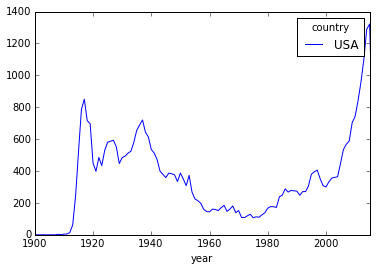

In [239]:
total_films = releases.groupby('year').size()
r = releases[['year', 'country']].groupby(['year', 'country']).size()
r = r.unstack(1).fillna(0)
r[['USA']].plot(xlim=(1900,2015))

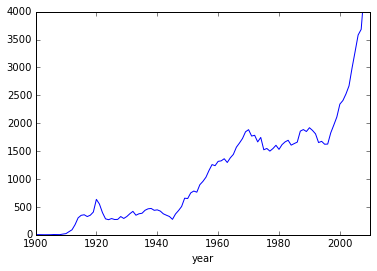

In [208]:
tr = titles.merge(releases[releases.country == 'USA'], how='left')
unrealeased = tr[tr.date.isnull() == True].groupby('year').size()
unrealeased.plot(xlim=(1900, 2010), ylim=(0, 4000))


###Number of roles avaliable to actors and actresses each Year

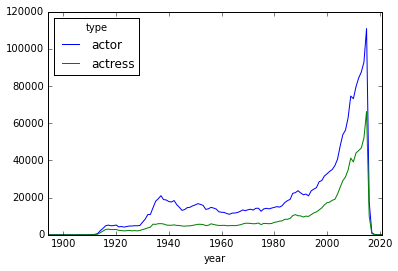

In [218]:
c = cast
c.groupby(['year', 'type']).size().unstack().fillna(0).plot()

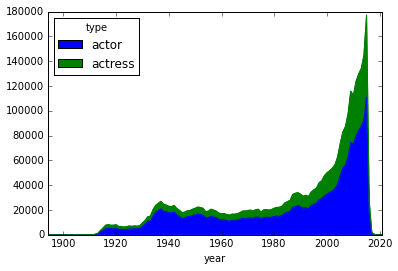

In [219]:
c = cast
c.groupby(['year', 'type']).size().unstack().fillna(0).plot(kind='area')

### Plot of the Fraction of roles 1-3 (1 = leading roll; 2,3 = supporting roll) that are Awareded to Men Over Time

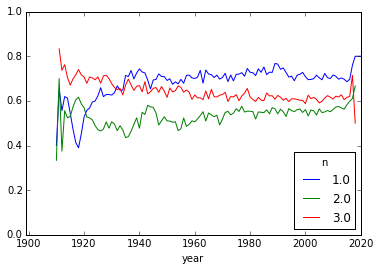

In [220]:
c = cast[cast.n <= 3]
g = c.groupby(['year', 'n', 'type']).size().unstack('type')
u = g.actor / (g.actor + g.actress)
u.unstack().plot(ylim=(0,1))

###Bar Graph Showing Which Month Movies with 'Christmas" in the Title are Released in the US

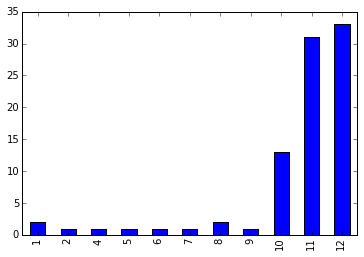

In [235]:
r = releases[releases.country == 'USA']
r = r[r.title.str.contains('Christmas')].date.dt.month
r.value_counts().sort_index().plot(kind='bar')

###Most Common Leading Actors in the US For Each decade And the Most Common Supports

In [191]:
us_releases = releases[releases.country == 'USA']
us_cast = cast.merge(us_releases, how='inner')[['title', 'year', 'name','type', 'character', 'n']]

In [237]:
#Leading Actors
df = pd.DataFrame(us_cast[us_cast.n == 1].groupby(['year', 'name', 'title']).size())
df.columns = ['num_leading_characters']
df = df.reset_index(df.index.names)
df = pd.DataFrame(df.groupby(['year', 'name']).size())
df.columns = ['num_leading_roles']
df = df.reset_index(df.index.names)
t = df.sort('num_leading_roles', ascending=False).groupby([df.year//10*10, 'name']).sum()
t = t.drop('year', axis=1).reset_index(t.index.names)
leads = t.sort('num_leading_roles', ascending=False).groupby('year').head(1).sort('year')
# Uncomment to see the top 5 for each decade
# for name, group in t.sort('num_leading_roles', ascending=False).groupby('year'):
#     print name
#     display(group.head())

print 'Summary:'
leads


Summary:


,year,name,num_leading_roles
0,1900,L. Frank Baum,1
646,1910,Mary Pickford,36
1348,1920,Hoot Gibson,63
2076,1930,Bob Steele,62
3996,1940,Johnny Mack Brown,75
4878,1950,George Montgomery,24
5781,1960,Elvis Presley,27
6535,1970,Clint Eastwood,13
7294,1980,Burt Reynolds,16
9305,1990,John Travolta,14


In [374]:
#Supporting Actors
df = pd.DataFrame(us_cast[us_cast.n == 2].groupby(['year', 'name', 'title']).size())
df.columns = ['num_supporting_characters']
df = df.reset_index(df.index.names)
df = pd.DataFrame(df.groupby(['year', 'name']).size())
df.columns = ['num_supporting_roles']
df = df.reset_index(df.index.names)
t = df.sort('num_supporting_roles', ascending=False).groupby([df.year//10*10, 'name']).sum()
t = t.drop('year', axis=1).reset_index(t.index.names)
supports = t.sort('num_supporting_roles', ascending=False).groupby('year').head(1).sort('year')
supports

,year,name,num_supporting_roles
0,1900,Frank Burns,1
815,1910,John Bowers,24
1776,1920,Conrad Nagel,31
4818,1930,Smiley Burnette,31
5065,1940,Al St. John,62
7031,1950,Huntz Hall,24
8800,1960,Suzanne Pleshette,9
9025,1970,Chieko Baish?,11
10642,1980,Kathleen Turner,7
12099,1990,Gene Hackman,11


In [375]:
#Combined for the "quintessential cast" of each Decade
leads['n'] = 1
supports['n'] = 2
perfect_cast = leads.merge(supports, on=['year'])
perfect_cast = perfect_cast.drop(['num_leading_roles', 'num_supporting_roles', 'n_x', 'n_y'], axis=1)
perfect_cast.columns = ['decade', 'lead', 'support']
perfect_cast

,decade,lead,support
0,1900,L. Frank Baum,Frank Burns
1,1910,Mary Pickford,John Bowers
2,1920,Hoot Gibson,Conrad Nagel
3,1930,Bob Steele,Smiley Burnette
4,1940,Johnny Mack Brown,Al St. John
5,1950,George Montgomery,Huntz Hall
6,1960,Elvis Presley,Suzanne Pleshette
7,1970,Clint Eastwood,Chieko Baish?
8,1980,Burt Reynolds,Kathleen Turner
9,1990,John Travolta,Gene Hackman
